In [2]:
# Import the dependencies
import pandas as pd
import os 
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

# Load the env file
load_dotenv()

True

In [3]:
# Create variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv('APCA_API_KEY_ID')
alpaca_secret_key = os.getenv('APCA_API_SECRET_KEY')

# Display the data type for the two keys:
display(type(alpaca_api_key))
display(type(alpaca_secret_key))

str

str

In [4]:
# Create the Alpaca object using the `tradeapi.REST` function - set the version to 'v2':
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version='v2'
)

In [5]:
# Create the list of tickers that you wish to analyze:
tickers = ['AAPL', 'GOOG', 'MSFT']

# Using the `pd.Timestamp` function, create the time horizon for your analysis:
start_date = pd.Timestamp('2019-12-11', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-12-11', tz='America/New_York').isoformat()

# Create the timeframe for your analysis:
timeframe = '1Day'

# Create a DataFrame using the `get_bars` function:
tech_stocks_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the first and last 10 rows of the `tech_stocks_df` DataFrame:
display(tech_stocks_df.head(10))
display(tech_stocks_df.tail(10))

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2019-12-11 05:00:00+00:00,270.77,271.1000,268.5000,139868,268.81,21815614,270.271298,AAPL
2019-12-12 05:00:00+00:00,271.46,272.5599,267.3210,261551,267.78,36497649,270.226389,AAPL
2019-12-13 05:00:00+00:00,275.15,275.3000,270.9300,253416,271.46,35174659,273.943545,AAPL
2019-12-16 05:00:00+00:00,279.86,280.7900,276.9800,203146,277.00,35353219,279.665135,AAPL
2019-12-17 05:00:00+00:00,280.41,281.7700,278.8000,195569,279.50,31446859,280.586519,AAPL
2019-12-18 05:00:00+00:00,279.74,281.9000,279.1200,181289,279.80,32228050,280.226670,AAPL
2019-12-19 05:00:00+00:00,280.02,281.1800,278.9500,161577,279.50,28012338,279.891586,AAPL
2019-12-20 05:00:00+00:00,279.44,282.6500,278.5600,213927,282.23,92286056,280.185166,AAPL
2019-12-23 05:00:00+00:00,284.00,284.2500,280.3735,169953,280.53,28094990,283.267962,AAPL


,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2023-11-28 05:00:00+00:00,382.70,383.0000,378.160,359084,378.35,20457971,381.538263,MSFT
2023-11-29 05:00:00+00:00,378.85,384.3000,377.440,405673,383.76,28967214,379.513925,MSFT
2023-11-30 05:00:00+00:00,378.91,380.0900,375.470,364168,378.49,31179048,378.152087,MSFT
2023-12-01 05:00:00+00:00,374.51,378.1600,371.310,516940,376.76,33040472,374.014252,MSFT
2023-12-04 05:00:00+00:00,369.14,369.5200,362.900,504284,369.10,32068877,367.210868,MSFT
2023-12-05 05:00:00+00:00,372.52,373.0750,365.621,373877,366.45,23070400,371.207963,MSFT
2023-12-06 05:00:00+00:00,368.80,374.1800,368.030,326443,373.54,21184316,369.970289,MSFT
2023-12-07 05:00:00+00:00,370.95,371.4527,366.320,325038,368.23,23121215,369.858132,MSFT
2023-12-08 05:00:00+00:00,374.23,374.4600,368.230,297167,369.20,20147929,372.775640,MSFT


In [7]:
# Reorganize the DataFrame by separating the ticker data:
AAPL = tech_stocks_df[tech_stocks_df['symbol']== 'AAPL'].drop('symbol', axis=1)
GOOG = tech_stocks_df[tech_stocks_df['symbol']== 'GOOG'].drop('symbol', axis=1)
MSFT = tech_stocks_df[tech_stocks_df['symbol']== 'MSFT'].drop('symbol', axis=1)

# Concatenate the data:
tech_stocks_df = pd.concat([AAPL, GOOG, MSFT], axis=1, keys=['AAPL', 'GOOG', 'MSFT'])

# Review the DataFrame:
display(tech_stocks_df.head(10))
display(tech_stocks_df.tail(10))

AAPL                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2019-12-11 05:00:00+00:00  270.77  271.1000  268.5000      139868  268.81   
2019-12-12 05:00:00+00:00  271.46  272.5599  267.3210      261551  267.78   
2019-12-13 05:00:00+00:00  275.15  275.3000  270.9300      253416  271.46   
2019-12-16 05:00:00+00:00  279.86  280.7900  276.9800      203146  277.00   
2019-12-17 05:00:00+00:00  280.41  281.7700  278.8000      195569  279.50   
2019-12-18 05:00:00+00:00  279.74  281.9000  279.1200      181289  279.80   
2019-12-19 05:00:00+00:00  280.02  281.1800  278.9500      161577  279.50   
2019-12-20 05:00:00+00:00  279.44  282.6500  278.5600      213927  282.23   
2019-12-23 05:00:00+00:00  284.00  284.2500  280.3735      169953  280.53   
2019-12-24 05:00:00+00:00  284.27  284.8900  282.9197       82671  284.69   

                                                    GOOG             \
                             volume        vwap    close       high   
timestamp                                                             
2019-12-11 05:00:00+00:00  21815614  270.271298  1345.02  1351.2000   
2019-12-12 05:00:00+00:00  36497649  270.226389  1350.27  1355.7750   
2019-12-13 05:00:00+00:00  35174659  273.943545  1347.83  1353.0931   
2019-12-16 05:00:00+00:00  35353219  279.665135  1361.17  1364.6800   
2019-12-17 05:00:00+00:00  31446859  280.586519  1355.12  1365.0000   
2019-12-18 05:00:00+00:00  32228050  280.226670  1352.62  1360.4700   
2019-12-19 05:00:00+00:00  28012338  279.891586  1356.04  1358.1000   
2019-12-20 05:00:00+00:00  92286056  280.185166  1349.59  1363.6400   
2019-12-23 05:00:00+00:00  28094990  283.267962  1348.84  1359.7999   
2019-12-24 05:00:00+00:00  12765748  284.098909  1343.56  1350.2600   

                                      ...                                 \
                                 low  ...     open   volume         vwap   
timestamp                             ...                                  
2019-12-11 05:00:00+00:00  1342.6700  ...  1350.84   959203  1345.250681   
2019-12-12 05:00:00+00:00  1340.5000  ...  1345.94  1391445  1348.655715   
2019-12-13 05:00:00+00:00  1343.8700  ...  1347.95  1674318  1348.285079   
2019-12-16 05:00:00+00:00  1352.6700  ...  1356.50  1573743  1360.314674   
2019-12-17 05:00:00+00:00  1351.3231  ...  1362.89  2031785  1356.173328   
2019-12-18 05:00:00+00:00  1351.0000  ...  1356.60  1827529  1353.855333   
2019-12-19 05:00:00+00:00  1348.9850  ...  1351.82  1679094  1354.601366   
2019-12-20 05:00:00+00:00  1349.0000  ...  1363.35  4770565  1352.939809   
2019-12-23 05:00:00+00:00  1346.5100  ...  1355.87   990529  1350.911954   
2019-12-24 05:00:00+00:00  1342.7800  ...  1348.50   397908  1344.946032   

                             MSFT                                         \
                            close    high      low trade_count      open   
timestamp                                                                  
2019-12-11 05:00:00+00:00  151.70  151.87  150.330      116414  151.5400   
2019-12-12 05:00:00+00:00  153.24  153.44  151.020      184671  151.6500   
2019-12-13 05:00:00+00:00  154.53  154.89  152.830      178606  153.0035   
2019-12-16 05:00:00+00:00  155.53  155.90  154.820      142212  155.1100   
2019-12-17 05:00:00+00:00  154.69  155.71  154.450      150540  155.4500   
2019-12-18 05:00:00+00:00  154.37  155.48  154.180      122815  154.3000   
2019-12-19 05:00:00+00:00  155.71  155.77  153.750      133290  154.0000   
2019-12-20 05:00:00+00:00  157.41  158.49  156.290      161333  157.3500   
2019-12-23 05:00:00+00:00  157.41  158.12  157.270      121834  158.1200   
2019-12-24 05:00:00+00:00  157.38  157.71  157.115       51543  157.4800   

                                                 
                             volume        vwap  
timestamp                

AAPL                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2023-11-28 05:00:00+00:00  190.40  191.08  189.4000      458379  189.78   
2023-11-29 05:00:00+00:00  189.37  192.09  188.9700      493157  190.90   
2023-11-30 05:00:00+00:00  189.95  190.32  188.1900      486962  189.84   
2023-12-01 05:00:00+00:00  191.24  191.56  189.2300      515541  190.33   
2023-12-04 05:00:00+00:00  189.43  190.05  187.4511      587629  189.98   
2023-12-05 05:00:00+00:00  193.42  194.40  190.1800      700936  190.21   
2023-12-06 05:00:00+00:00  192.32  194.76  192.1100      491536  194.45   
2023-12-07 05:00:00+00:00  194.27  195.00  193.5900      495114  193.63   
2023-12-08 05:00:00+00:00  195.71  195.99  193.6700      538451  194.20   
2023-12-11 05:00:00+00:00  193.18  193.49  191.4200      690312  193.11   

                                                   GOOG                    \
                             volume        vwap   close    high       low   
timestamp                                                                   
2023-11-28 05:00:00+00:00  38422811  190.164893  138.62  138.66  137.0400   
2023-11-29 05:00:00+00:00  43017537  189.997334  136.40  139.67  136.2950   
2023-11-30 05:00:00+00:00  48804815  189.336587  133.92  136.96  132.7900   
2023-12-01 05:00:00+00:00  45704824  190.861022  133.32  133.50  132.1517   
2023-12-04 05:00:00+00:00  43396215  188.916002  130.63  131.45  129.4000   
2023-12-05 05:00:00+00:00  66654222  193.171615  132.39  133.54  129.7300   
2023-12-06 05:00:00+00:00  41092772  192.801209  131.43  133.31  131.3100   
2023-12-07 05:00:00+00:00  47485364  194.397014  138.45  140.00  136.2300   
2023-12-08 05:00:00+00:00  53395144  195.163933  136.64  137.99  135.5700   
2023-12-11 05:00:00+00:00  60909640  192.708538  134.70  134.79  132.8900   

                           ...                                   MSFT  \
                           ...     open    volume        vwap   close   
timestamp                  ...                                          
2023-11-28 05:00:00+00:00  ...  137.630  17050066  138.117692  382.70   
2023-11-29 05:00:00+00:00  ...  138.985  21017761  137.175696  378.85   
2023-11-30 05:00:00+00:00  ...  136.400  29916997  133.981977  378.91   
2023-12-01 05:00:00+00:00  ...  133.320  24267989  132.945798  374.51   
2023-12-04 05:00:00+00:00  ...  131.294  24121231  130.293941  369.14   
2023-12-05 05:00:00+00:00  ...  130.370  19242850  132.149966  372.52   
2023-12-06 05:00:00+00:00  ...  132.900  16373332  132.084458  368.80   
2023-12-07 05:00:00+00:00  ...  136.600  38429799  138.445177  370.95   
2023-12-08 05:00:00+00:00  ...  135.660  23004302  136.629444  374.23   
2023-12-11 05:00:00+00:00  ...  133.820  24467495  134.147538  371.30   

                                                                            \
                               high      low trade_count    open    volume   
timestamp                                                                    
2023-11-28 05:00:00+00:00  383.0000  378.160      359084  378.35  20457971   
2023-11-29 05:00:00+00:00  384.3000  377.440      405673  383.76  28967214   
2023-11-30 05:00:00+00:00  380.0900  375.470      364168  378.49  31179048   
2023-12-01 05:00:00+00:00  378.1600  371.310      516940  376.76  33040472   
2023-12-04 05:00:00+00:00  369.5200  362.900      504284  369.10  32068877   
2023-12-05 05:00:00+00:00  373.0750  365.621      373877  366.45  23070400   
2023-12-06 05:00:00+00:00  374.1800  368.030      326443  373.54  21184316   
2023-12-07 05:00:00+00:00  371.4527  366.320      325038  368.23  23121215   
2023-12-08 05:00:00+00:00  374.4600  368.230      297167  369.20  20147929   
2023-12-11 05:00:00+00:00  371.6000  366.100      414040  368.48  27692211   

                                       
                                 vwap  
timest

In [8]:
# Create the Monte Carlo object with weights of 40%, 20%, 40%, respectively for AAPL, GOOG, MSFT,
# over the timespan of 4 years
MC_tech_stocks = MCSimulation(
    portfolio_data = tech_stocks_df,
    weights = [.4, .2, .4],
    num_simulation = 1000,
    num_trading_days = 252*4
)

# Review the first and last 10 rows of data:
display(MC_tech_stocks.portfolio_data.head(10))
display(MC_tech_stocks.portfolio_data.tail(10))

AAPL                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2019-12-11 05:00:00+00:00  270.77  271.1000  268.5000      139868  268.81   
2019-12-12 05:00:00+00:00  271.46  272.5599  267.3210      261551  267.78   
2019-12-13 05:00:00+00:00  275.15  275.3000  270.9300      253416  271.46   
2019-12-16 05:00:00+00:00  279.86  280.7900  276.9800      203146  277.00   
2019-12-17 05:00:00+00:00  280.41  281.7700  278.8000      195569  279.50   
2019-12-18 05:00:00+00:00  279.74  281.9000  279.1200      181289  279.80   
2019-12-19 05:00:00+00:00  280.02  281.1800  278.9500      161577  279.50   
2019-12-20 05:00:00+00:00  279.44  282.6500  278.5600      213927  282.23   
2019-12-23 05:00:00+00:00  284.00  284.2500  280.3735      169953  280.53   
2019-12-24 05:00:00+00:00  284.27  284.8900  282.9197       82671  284.69   

                                                                 GOOG  \
                             volume        vwap daily_return    close   
timestamp                                                               
2019-12-11 05:00:00+00:00  21815614  270.271298          NaN  1345.02   
2019-12-12 05:00:00+00:00  36497649  270.226389     0.002548  1350.27   
2019-12-13 05:00:00+00:00  35174659  273.943545     0.013593  1347.83   
2019-12-16 05:00:00+00:00  35353219  279.665135     0.017118  1361.17   
2019-12-17 05:00:00+00:00  31446859  280.586519     0.001965  1355.12   
2019-12-18 05:00:00+00:00  32228050  280.226670    -0.002389  1352.62   
2019-12-19 05:00:00+00:00  28012338  279.891586     0.001001  1356.04   
2019-12-20 05:00:00+00:00  92286056  280.185166    -0.002071  1349.59   
2019-12-23 05:00:00+00:00  28094990  283.267962     0.016318  1348.84   
2019-12-24 05:00:00+00:00  12765748  284.098909     0.000951  1343.56   

                                      ...                              MSFT  \
                                high  ...         vwap daily_return   close   
timestamp                             ...                                     
2019-12-11 05:00:00+00:00  1351.2000  ...  1345.250681          NaN  151.70   
2019-12-12 05:00:00+00:00  1355.7750  ...  1348.655715     0.003903  153.24   
2019-12-13 05:00:00+00:00  1353.0931  ...  1348.285079    -0.001807  154.53   
2019-12-16 05:00:00+00:00  1364.6800  ...  1360.314674     0.009897  155.53   
2019-12-17 05:00:00+00:00  1365.0000  ...  1356.173328    -0.004445  154.69   
2019-12-18 05:00:00+00:00  1360.4700  ...  1353.855333    -0.001845  154.37   
2019-12-19 05:00:00+00:00  1358.1000  ...  1354.601366     0.002528  155.71   
2019-12-20 05:00:00+00:00  1363.6400  ...  1352.939809    -0.004756  157.41   
2019-12-23 05:00:00+00:00  1359.7999  ...  1350.911954    -0.000556  157.41   
2019-12-24 05:00:00+00:00  1350.2600  ...  1344.946032    -0.003914  157.38   

                                                                            \
                             high      low trade_count      open    volume   
timestamp                                                                    
2019-12-11 05:00:00+00:00  151.87  150.330      116414  151.5400  21983542   
2019-12-12 05:00:00+00:00  153.44  151.020      184671  151.6500  28027178   
2019-12-13 05:00:00+00:00  154.89  152.830      178606  153.0035  26212681   
2019-12-16 05:00:00+00:00  155.90  154.820      142212  155.1100  28294201   
2019-12-17 05:00:00+00:00  155.71  154.450      150540  155.4500  29572296   
2019-12-18 05:00:00+00:00  155.48  154.180      122815  154.3000  28753722   
2019-12-19 05:00:00+00:00  155.77  153.750      133290  154.0000  30837662   
2019-12-20 05:00:00+00:00  158.49  156.290      161333  157.3500  76601601   
2019-12-23 05:00:00+00:00  158.12  157.270      121834  158.1200  21190563   
2019-12-24 05:00:00+00:00  157.71  157.115       51543  157.4800   9966594   

                                  

AAPL                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2023-11-28 05:00:00+00:00  190.40  191.08  189.4000      458379  189.78   
2023-11-29 05:00:00+00:00  189.37  192.09  188.9700      493157  190.90   
2023-11-30 05:00:00+00:00  189.95  190.32  188.1900      486962  189.84   
2023-12-01 05:00:00+00:00  191.24  191.56  189.2300      515541  190.33   
2023-12-04 05:00:00+00:00  189.43  190.05  187.4511      587629  189.98   
2023-12-05 05:00:00+00:00  193.42  194.40  190.1800      700936  190.21   
2023-12-06 05:00:00+00:00  192.32  194.76  192.1100      491536  194.45   
2023-12-07 05:00:00+00:00  194.27  195.00  193.5900      495114  193.63   
2023-12-08 05:00:00+00:00  195.71  195.99  193.6700      538451  194.20   
2023-12-11 05:00:00+00:00  193.18  193.49  191.4200      690312  193.11   

                                                                GOOG          \
                             volume        vwap daily_return   close    high   
timestamp                                                                      
2023-11-28 05:00:00+00:00  38422811  190.164893     0.003214  138.62  138.66   
2023-11-29 05:00:00+00:00  43017537  189.997334    -0.005410  136.40  139.67   
2023-11-30 05:00:00+00:00  48804815  189.336587     0.003063  133.92  136.96   
2023-12-01 05:00:00+00:00  45704824  190.861022     0.006791  133.32  133.50   
2023-12-04 05:00:00+00:00  43396215  188.916002    -0.009465  130.63  131.45   
2023-12-05 05:00:00+00:00  66654222  193.171615     0.021063  132.39  133.54   
2023-12-06 05:00:00+00:00  41092772  192.801209    -0.005687  131.43  133.31   
2023-12-07 05:00:00+00:00  47485364  194.397014     0.010139  138.45  140.00   
2023-12-08 05:00:00+00:00  53395144  195.163933     0.007412  136.64  137.99   
2023-12-11 05:00:00+00:00  60909640  192.708538    -0.012927  134.70  134.79   

                           ...                             MSFT            \
                           ...        vwap daily_return   close      high   
timestamp                  ...                                              
2023-11-28 05:00:00+00:00  ...  138.117692     0.004129  382.70  383.0000   
2023-11-29 05:00:00+00:00  ...  137.175696    -0.016015  378.85  384.3000   
2023-11-30 05:00:00+00:00  ...  133.981977    -0.018182  378.91  380.0900   
2023-12-01 05:00:00+00:00  ...  132.945798    -0.004480  374.51  378.1600   
2023-12-04 05:00:00+00:00  ...  130.293941    -0.020177  369.14  369.5200   
2023-12-05 05:00:00+00:00  ...  132.149966     0.013473  372.52  373.0750   
2023-12-06 05:00:00+00:00  ...  132.084458    -0.007251  368.80  374.1800   
2023-12-07 05:00:00+00:00  ...  138.445177     0.053412  370.95  371.4527   
2023-12-08 05:00:00+00:00  ...  136.629444    -0.013073  374.23  374.4600   
2023-12-11 05:00:00+00:00  ...  134.147538    -0.014198  371.30  371.6000   

                                                                              \
                               low trade_count    open    volume        vwap   
timestamp                                                                      
2023-11-28 05:00:00+00:00  378.160      359084  378.35  20457971  381.538263   
2023-11-29 05:00:00+00:00  377.440      405673  383.76  28967214  379.513925   
2023-11-30 05:00:00+00:00  375.470      364168  378.49  31179048  378.152087   
2023-12-01 05:00:00+00:00  371.310      516940  376.76  33040472  374.014252   
2023-12-04 05:00:00+00:00  362.900      504284  369.10  32068877  367.210868   
2023-12-05 05:00:00+00:00  365.621      373877  366.45  23070400  371.207963   
2023-12-06 05:00:00+00:00  368.030      326443  373.54  21184316  369.970289   
2023-12-07 05:00:00+00:00  366.320      325038  368.23  23121215  369.858132   
2023-12-08 05:00:00+00:00  368.230      297167  369.20  20147929  372.775640   
2023-12-11 05:00:00+00:00  366.100      414040  36

In [31]:
# Run the Monte Carlo cumulative returns simulation using the 40/20/40 weights:


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 110.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 120.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 130.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 140.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 150.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 160.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 170.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 180.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 190.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 200.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 210.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 220.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 230.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 240.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 250.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 260.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 270.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 280.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 290.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 300.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 310.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 320.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 330.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 340.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 350.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 360.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 370.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 380.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 390.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 400.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 410.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 420.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 430.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 440.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 450.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 460.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 470.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 480.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 490.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 500.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 510.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 520.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 530.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 540.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 550.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 560.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 570.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 580.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 590.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 600.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 610.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 620.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 630.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 640.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 650.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 660.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 670.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 680.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 690.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 700.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 710.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 720.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 730.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 740.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 750.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 760.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 770.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 780.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 790.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 800.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 810.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 820.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 830.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 840.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 850.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 860.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 870.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 880.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 890.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 900.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 910.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 920.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 930.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 940.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 950.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 960.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 970.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 980.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 990.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1008 Trading Days.'}>

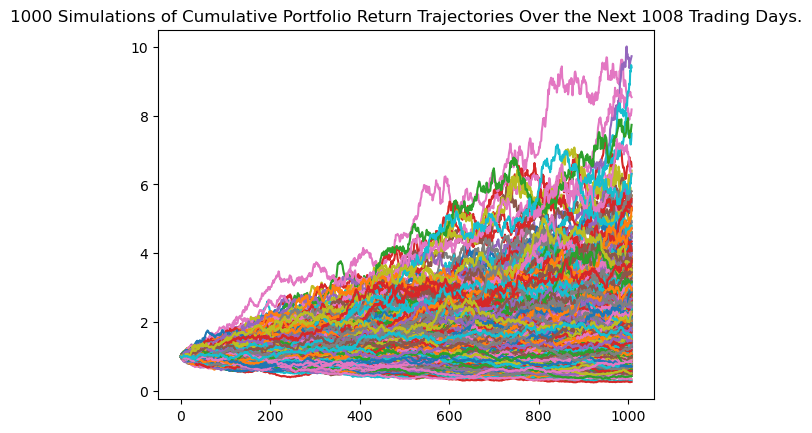

In [10]:
# Create a line plot for the results of the 40/20/40 weighted simulation:
MC_tech_stocks.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

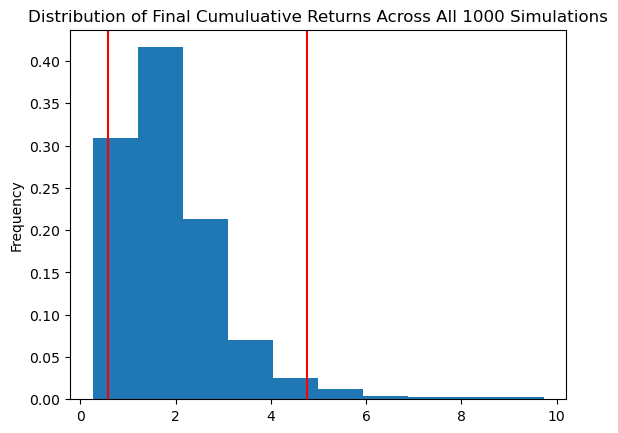

In [11]:
# Plot the distribution of the simulation results:
MC_tech_stocks.plot_distribution()

In [12]:
# Create a variable that reviews the summary statistics for the 40/20/40 cumulative returns simulation:
MC_tech_stats_1 = MC_tech_stocks.summarize_cumulative_return()

# Print the results
MC_tech_stats_1

C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


count           1000.000000
mean               1.909471
std                1.143924
min                0.260734
25%                1.119235
50%                1.657489
75%                2.411838
max                9.727750
95% CI Lower       0.576215
95% CI Upper       4.756789
Name: 1008, dtype: float64

In [15]:
# Calculate the Lower and Upper bound returns using an initial investment of $10,000:
MC_95_lower = MC_tech_stats_1[8] * 10000
MC_95_upper = MC_tech_stats_1[9] * 10000

# Print the results of the calculations:
print(f'With an initial investment of $10,000,'
      f' the lower bound return after 4 years will be ${MC_95_lower:.2f}'
      f' and the upper bound return after 4 years will be ${MC_95_upper:.2f}.'
     )

With an initial investment of $10,000, the lower bound return after 4 years will be $5762.15 and the upper bound return after 4 years will be $47567.89.


In [18]:
# Configure a Monte Carlo simulation for 4 years using weights of 40/40/20 respectively:
MC_tech_stocks_2 = MCSimulation(
    portfolio_data = tech_stocks_df,
    weights = [.4, .4, .2],
    num_simulation = 1000,
    num_trading_days = 252*4
)

# Review the Monte Carlo results for MC_tech_stocks_2:
display(MC_tech_stocks_2.portfolio_data.head(10))
display(MC_tech_stocks_2.portfolio_data.tail(10))

AAPL                                          \
                            close      high       low trade_count    open   
timestamp                                                                   
2019-12-11 05:00:00+00:00  270.77  271.1000  268.5000      139868  268.81   
2019-12-12 05:00:00+00:00  271.46  272.5599  267.3210      261551  267.78   
2019-12-13 05:00:00+00:00  275.15  275.3000  270.9300      253416  271.46   
2019-12-16 05:00:00+00:00  279.86  280.7900  276.9800      203146  277.00   
2019-12-17 05:00:00+00:00  280.41  281.7700  278.8000      195569  279.50   
2019-12-18 05:00:00+00:00  279.74  281.9000  279.1200      181289  279.80   
2019-12-19 05:00:00+00:00  280.02  281.1800  278.9500      161577  279.50   
2019-12-20 05:00:00+00:00  279.44  282.6500  278.5600      213927  282.23   
2019-12-23 05:00:00+00:00  284.00  284.2500  280.3735      169953  280.53   
2019-12-24 05:00:00+00:00  284.27  284.8900  282.9197       82671  284.69   

                                                                 GOOG  \
                             volume        vwap daily_return    close   
timestamp                                                               
2019-12-11 05:00:00+00:00  21815614  270.271298          NaN  1345.02   
2019-12-12 05:00:00+00:00  36497649  270.226389     0.002548  1350.27   
2019-12-13 05:00:00+00:00  35174659  273.943545     0.013593  1347.83   
2019-12-16 05:00:00+00:00  35353219  279.665135     0.017118  1361.17   
2019-12-17 05:00:00+00:00  31446859  280.586519     0.001965  1355.12   
2019-12-18 05:00:00+00:00  32228050  280.226670    -0.002389  1352.62   
2019-12-19 05:00:00+00:00  28012338  279.891586     0.001001  1356.04   
2019-12-20 05:00:00+00:00  92286056  280.185166    -0.002071  1349.59   
2019-12-23 05:00:00+00:00  28094990  283.267962     0.016318  1348.84   
2019-12-24 05:00:00+00:00  12765748  284.098909     0.000951  1343.56   

                                      ...                              MSFT  \
                                high  ...         vwap daily_return   close   
timestamp                             ...                                     
2019-12-11 05:00:00+00:00  1351.2000  ...  1345.250681          NaN  151.70   
2019-12-12 05:00:00+00:00  1355.7750  ...  1348.655715     0.003903  153.24   
2019-12-13 05:00:00+00:00  1353.0931  ...  1348.285079    -0.001807  154.53   
2019-12-16 05:00:00+00:00  1364.6800  ...  1360.314674     0.009897  155.53   
2019-12-17 05:00:00+00:00  1365.0000  ...  1356.173328    -0.004445  154.69   
2019-12-18 05:00:00+00:00  1360.4700  ...  1353.855333    -0.001845  154.37   
2019-12-19 05:00:00+00:00  1358.1000  ...  1354.601366     0.002528  155.71   
2019-12-20 05:00:00+00:00  1363.6400  ...  1352.939809    -0.004756  157.41   
2019-12-23 05:00:00+00:00  1359.7999  ...  1350.911954    -0.000556  157.41   
2019-12-24 05:00:00+00:00  1350.2600  ...  1344.946032    -0.003914  157.38   

                                                                            \
                             high      low trade_count      open    volume   
timestamp                                                                    
2019-12-11 05:00:00+00:00  151.87  150.330      116414  151.5400  21983542   
2019-12-12 05:00:00+00:00  153.44  151.020      184671  151.6500  28027178   
2019-12-13 05:00:00+00:00  154.89  152.830      178606  153.0035  26212681   
2019-12-16 05:00:00+00:00  155.90  154.820      142212  155.1100  28294201   
2019-12-17 05:00:00+00:00  155.71  154.450      150540  155.4500  29572296   
2019-12-18 05:00:00+00:00  155.48  154.180      122815  154.3000  28753722   
2019-12-19 05:00:00+00:00  155.77  153.750      133290  154.0000  30837662   
2019-12-20 05:00:00+00:00  158.49  156.290      161333  157.3500  76601601   
2019-12-23 05:00:00+00:00  158.12  157.270      121834  158.1200  21190563   
2019-12-24 05:00:00+00:00  157.71  157.115       51543  157.4800   9966594   

                                  

AAPL                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2023-11-28 05:00:00+00:00  190.40  191.08  189.4000      458379  189.78   
2023-11-29 05:00:00+00:00  189.37  192.09  188.9700      493157  190.90   
2023-11-30 05:00:00+00:00  189.95  190.32  188.1900      486962  189.84   
2023-12-01 05:00:00+00:00  191.24  191.56  189.2300      515541  190.33   
2023-12-04 05:00:00+00:00  189.43  190.05  187.4511      587629  189.98   
2023-12-05 05:00:00+00:00  193.42  194.40  190.1800      700936  190.21   
2023-12-06 05:00:00+00:00  192.32  194.76  192.1100      491536  194.45   
2023-12-07 05:00:00+00:00  194.27  195.00  193.5900      495114  193.63   
2023-12-08 05:00:00+00:00  195.71  195.99  193.6700      538451  194.20   
2023-12-11 05:00:00+00:00  193.18  193.49  191.4200      690312  193.11   

                                                                GOOG          \
                             volume        vwap daily_return   close    high   
timestamp                                                                      
2023-11-28 05:00:00+00:00  38422811  190.164893     0.003214  138.62  138.66   
2023-11-29 05:00:00+00:00  43017537  189.997334    -0.005410  136.40  139.67   
2023-11-30 05:00:00+00:00  48804815  189.336587     0.003063  133.92  136.96   
2023-12-01 05:00:00+00:00  45704824  190.861022     0.006791  133.32  133.50   
2023-12-04 05:00:00+00:00  43396215  188.916002    -0.009465  130.63  131.45   
2023-12-05 05:00:00+00:00  66654222  193.171615     0.021063  132.39  133.54   
2023-12-06 05:00:00+00:00  41092772  192.801209    -0.005687  131.43  133.31   
2023-12-07 05:00:00+00:00  47485364  194.397014     0.010139  138.45  140.00   
2023-12-08 05:00:00+00:00  53395144  195.163933     0.007412  136.64  137.99   
2023-12-11 05:00:00+00:00  60909640  192.708538    -0.012927  134.70  134.79   

                           ...                             MSFT            \
                           ...        vwap daily_return   close      high   
timestamp                  ...                                              
2023-11-28 05:00:00+00:00  ...  138.117692     0.004129  382.70  383.0000   
2023-11-29 05:00:00+00:00  ...  137.175696    -0.016015  378.85  384.3000   
2023-11-30 05:00:00+00:00  ...  133.981977    -0.018182  378.91  380.0900   
2023-12-01 05:00:00+00:00  ...  132.945798    -0.004480  374.51  378.1600   
2023-12-04 05:00:00+00:00  ...  130.293941    -0.020177  369.14  369.5200   
2023-12-05 05:00:00+00:00  ...  132.149966     0.013473  372.52  373.0750   
2023-12-06 05:00:00+00:00  ...  132.084458    -0.007251  368.80  374.1800   
2023-12-07 05:00:00+00:00  ...  138.445177     0.053412  370.95  371.4527   
2023-12-08 05:00:00+00:00  ...  136.629444    -0.013073  374.23  374.4600   
2023-12-11 05:00:00+00:00  ...  134.147538    -0.014198  371.30  371.6000   

                                                                              \
                               low trade_count    open    volume        vwap   
timestamp                                                                      
2023-11-28 05:00:00+00:00  378.160      359084  378.35  20457971  381.538263   
2023-11-29 05:00:00+00:00  377.440      405673  383.76  28967214  379.513925   
2023-11-30 05:00:00+00:00  375.470      364168  378.49  31179048  378.152087   
2023-12-01 05:00:00+00:00  371.310      516940  376.76  33040472  374.014252   
2023-12-04 05:00:00+00:00  362.900      504284  369.10  32068877  367.210868   
2023-12-05 05:00:00+00:00  365.621      373877  366.45  23070400  371.207963   
2023-12-06 05:00:00+00:00  368.030      326443  373.54  21184316  369.970289   
2023-12-07 05:00:00+00:00  366.320      325038  368.23  23121215  369.858132   
2023-12-08 05:00:00+00:00  368.230      297167  369.20  20147929  372.775640   
2023-12-11 05:00:00+00:00  366.100      414040  36

In [20]:
# Run the cumulative returns Monte Carlo simulation for MC_tech_stocks_2:
MC_tech_stocks_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 110.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 120.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 130.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 140.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 150.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 160.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 170.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 180.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 190.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 200.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 210.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 220.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 230.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 240.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 250.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 260.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 270.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 280.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 290.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 300.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 310.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 320.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 330.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 340.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 350.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 360.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 370.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 380.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 390.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 400.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 410.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 420.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 430.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 440.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 450.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 460.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 470.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 480.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 490.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 500.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 510.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 520.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 530.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 540.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 550.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 560.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 570.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 580.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 590.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 600.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 610.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 620.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 630.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 640.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 650.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 660.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 670.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 680.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 690.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 700.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 710.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 720.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 730.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 740.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 750.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 760.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 770.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 780.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 790.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 800.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 810.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 820.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 830.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 840.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 850.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 860.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 870.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 880.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 890.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 900.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 910.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 920.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 930.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 940.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 950.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 960.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 970.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 980.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

Running Monte Carlo simulation number 990.


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\legar\Desktop

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.030377,1.010707,1.002665,0.992899,1.026619,1.017292,1.042956,1.014776,0.967330,1.010177,...,0.995280,0.942435,1.009811,0.992621,0.989841,0.983362,1.021548,1.015874,1.013355,0.965306
2,1.013039,0.995446,1.032593,0.978568,1.041601,1.057772,1.071407,1.000862,0.983069,1.010349,...,0.998664,0.957571,1.014095,0.997585,1.010812,0.980471,1.012096,1.023758,1.044764,0.985301
3,1.006077,0.970735,1.051466,0.950910,1.060334,1.066517,1.044795,0.971344,0.967638,0.994505,...,0.990570,0.933551,1.012386,0.991363,1.002370,0.993853,0.998874,1.034307,1.061565,0.926094
4,0.978324,0.978345,1.068334,0.938769,1.108045,1.033734,1.041001,0.937469,0.994155,0.976604,...,0.980124,0.932679,0.964978,0.957177,1.005222,0.981874,0.984611,1.068330,1.068619,0.932042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,2.519377,0.808073,1.495128,1.264966,1.480065,1.560513,1.976173,1.126544,3.004930,0.818515,...,1.969372,0.849816,0.934095,3.204911,1.028576,0.526627,0.641733,3.097386,1.007575,1.332184
1005,2.613312,0.833932,1.503284,1.288568,1.459578,1.570648,1.917908,1.106941,3.076666,0.813410,...,1.998091,0.834202,0.931778,3.208407,1.024939,0.511035,0.622529,3.036903,1.002879,1.292086
1006,2.690983,0.835655,1.515986,1.258257,1.411221,1.553301,1.918334,1.135109,3.090324,0.827637,...,2.037185,0.850382,0.919678,3.254229,1.011327,0.500665,0.588729,2.976956,1.010387,1.323677
1007,2.734831,0.828157,1.534371,1.262361,1.419490,1.568186,1.928786,1.104469,3.126758,0.824776,...,2.059664,0.862480,0.905435,3.304028,1.014996,0.504943,0.597552,2.957416,0.986195,1.348427


<AxesSubplot:title={'center':'1000 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1008 Trading Days.'}>

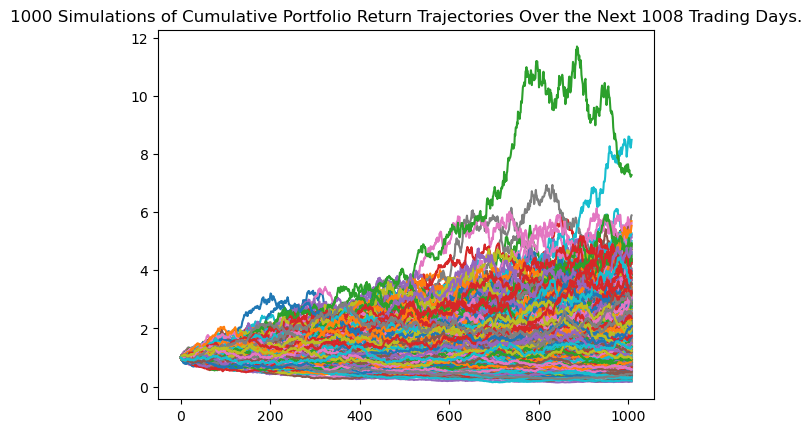

In [22]:
# Plot the results of the cumulative returns simulation for the 40/40/20 split:
MC_tech_stocks_2.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 1000 Simulations'}, ylabel='Frequency'>

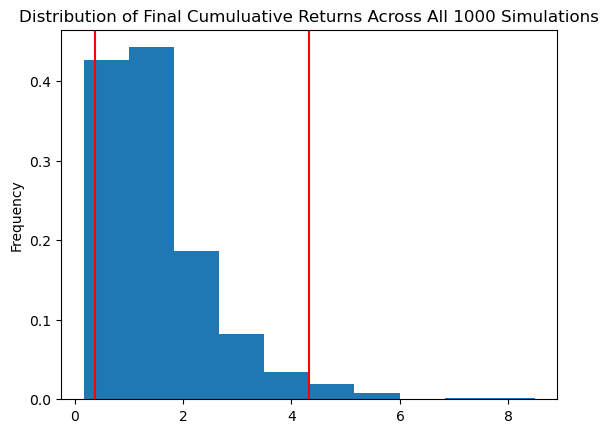

In [23]:
# Plot the distribution of the `MC_tech_stocks_2` split:
MC_tech_stocks_2.plot_distribution()

In [25]:
# Create a variable for the summary statistics for MC_tech_stocks_2:
MC_tech_stats_2 = MC_tech_stocks_2.summarize_cumulative_return()

# Review the results:
print(MC_tech_stats_2)

count           1000.000000
mean               1.538776
std                1.016915
min                0.173313
25%                0.829930
50%                1.253965
75%                1.950477
max                8.487542
95% CI Lower       0.383549
95% CI Upper       4.325046
Name: 1008, dtype: float64


C:\Users\legar\Desktop\COMPUTER_SCIENCE\05_FINANCIAL_SIMULATIONS_APIS\L3_future_simulation\01-Three_Stock_Monte\Solved\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [26]:
# Calculate the lower and upper bound returns for the MC_tech_stocks_2 on a $10,000 investment:
MC_95_lower_2 = MC_tech_stats_2[8] * 10000
MC_95_upper_2 = MC_tech_stats_2[9] * 10000

# Print the results of the calculation:
print(f'With an initial investment of $10,000 and a weighted split of 40/40/20, the lower'
      f' bound return is projected to be ${MC_95_lower_2:.2f} and the upper bound return'
      f' is projected to be ${MC_95_upper_2:.2f}.')

With an initial investment of $10,000 and a weighted split of 40/40/20, the lower bound return is projected to be $3835.49 and the upper bound return is projected to be $43250.46.
